Finance Data Project

In [1]:
# In this data project we will focus on exploratory data analysis of stock prices.

In [26]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
%matplotlib inline

In [3]:
# We need to get data using pandas datareader. 
# We will get stock information for the following banks:

# Bank of America
# CitiGroup
# Goldman Sachs
# JPMorgan Chase
# Morgan Stanley
# Wells Fargo

In [4]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [5]:
BAC = data.DataReader('BAC', 'stooq', start, end)

In [6]:
BAC.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-12-31,14.7814,14.8325,14.6233,14.6233,5.417059e+07
2015-12-30,14.9473,14.9807,14.8070,14.8168,4.030734e+07
2015-12-29,14.9897,15.0780,14.9130,15.0131,5.251059e+07
2015-12-28,14.9630,14.9720,14.7539,14.8846,4.803435e+07
2015-12-24,15.0495,15.1035,14.9630,15.0063,3.380344e+07


In [7]:
# CitiGroup
C = data.DataReader('C', 'stooq', start, end)
# Goldman Sachs
GS = data.DataReader('GS', 'stooq', start, end)
# JPMorgan Chase
JPM = data.DataReader("JPM", 'stooq', start, end)
# Morgan Stanley
MS = data.DataReader('MS', 'stooq', start, end)
# Wells Fargo
WFC = data.DataReader("WFC", 'stooq', start, end)

In [8]:
# Create a list of the ticker symbols (as strings) in alphabetical order. 
# Call this list: tickers
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [9]:
# Use pd.concat to concatenate the bank dataframes together to a 
# single data frame called bank_stocks. Set the keys argument 
# equal to the tickers list. Also pay attention to what axis you concatenate on.

bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis = 1, keys=tickers) # concatinating against columns
bank_stocks.head() # Multilevel indexing on columns

BAC                                                 C  \
               Open     High      Low    Close        Volume     Open   
Date                                                                    
2006-01-03  39.4871  39.7023  38.8390  39.6217  1.936396e+07  405.492   
2006-01-04  39.5549  39.7592  39.0904  39.2004  2.110031e+07  404.358   
2006-01-05  39.2004  39.4126  38.9834  39.2525  1.761312e+07  400.843   
2006-01-06  39.3850  39.4774  39.0089  39.1917  1.496529e+07  404.504   
2006-01-09  39.3182  39.5294  39.0158  39.2181  1.855918e+07  402.174   

                                                         ...            MS  \
               High      Low    Close        Volume      ...          Open   
Date                                                     ...                 
2006-01-03  408.615  398.112  407.891  1.858097e+06      ...       37.4934   
2006-01-04  406.325  400.089  400.354  2.260921e+06      ...       38.4971   
2006-01-05  403.663  400.520  402.321  1.371893e+06      ...       38.2675   
2006-01-06  404.641  398.865  402.321  1.655812e+06      ...       38.5432   
2006-01-09  403.329  399.678  400.432  2.031072e+06      ...       38.4470   

                                                         WFC           \
               High      Low    Close        Volume     Open     High   
Date                                                                    
2006-01-03  38.3558  37.2060  38.2361  6.806387e+06  22.7430  23.0144   
2006-01-04  38.8778  38.2675  38.2675  1.009857e+07  22.8831  22.8979   
2006-01-05  38.4264  38.0448  38.3715  7.313990e+06  22.6690  22.7055   
2006-01-06  38.5922  38.0703  38.4108  8.721337e+06  22.7302  22.8643   
2006-01-09  38.8846  38.4412  38.8120  5.246244e+06  22.7983  22.8979   

                                            
                Low    Close        Volume  
Date                                        
2006-01-03  22.4559  22.9581  1.530724e+07  
2006-01-04  22.5683  22.6917  1.510382e+07  
2006-01-05  22.5308  22.6690  1.407726e+07  
2006-01-06  22.5920  22.7983  1.167705e+07  
2006-01-09  22.7055  22.7983  7.808415e+06  

[5 rows x 30 columns]

In [10]:
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']

In [11]:
bank_stocks.head()

Bank Ticker      BAC                                                 C  \
Stock Info      Open     High      Low    Close        Volume     Open   
Date                                                                     
2006-01-03   39.4871  39.7023  38.8390  39.6217  1.936396e+07  405.492   
2006-01-04   39.5549  39.7592  39.0904  39.2004  2.110031e+07  404.358   
2006-01-05   39.2004  39.4126  38.9834  39.2525  1.761312e+07  400.843   
2006-01-06   39.3850  39.4774  39.0089  39.1917  1.496529e+07  404.504   
2006-01-09   39.3182  39.5294  39.0158  39.2181  1.855918e+07  402.174   

Bank Ticker                                               ...            MS  \
Stock Info      High      Low    Close        Volume      ...          Open   
Date                                                      ...                 
2006-01-03   408.615  398.112  407.891  1.858097e+06      ...       37.4934   
2006-01-04   406.325  400.089  400.354  2.260921e+06      ...       38.4971   
2006-01-05   403.663  400.520  402.321  1.371893e+06      ...       38.2675   
2006-01-06   404.641  398.865  402.321  1.655812e+06      ...       38.5432   
2006-01-09   403.329  399.678  400.432  2.031072e+06      ...       38.4470   

Bank Ticker                                               WFC           \
Stock Info      High      Low    Close        Volume     Open     High   
Date                                                                     
2006-01-03   38.3558  37.2060  38.2361  6.806387e+06  22.7430  23.0144   
2006-01-04   38.8778  38.2675  38.2675  1.009857e+07  22.8831  22.8979   
2006-01-05   38.4264  38.0448  38.3715  7.313990e+06  22.6690  22.7055   
2006-01-06   38.5922  38.0703  38.4108  8.721337e+06  22.7302  22.8643   
2006-01-09   38.8846  38.4412  38.8120  5.246244e+06  22.7983  22.8979   

Bank Ticker                                  
Stock Info       Low    Close        Volume  
Date                                         
2006-01-03   22.4559  22.9581  1.530724e+07  
2006-01-04   22.5683  22.6917  1.510382e+07  
2006-01-05   22.5308  22.6690  1.407726e+07  
2006-01-06   22.5920  22.7983  1.167705e+07  
2006-01-09   22.7055  22.7983  7.808415e+06  

[5 rows x 30 columns]

EDA

In [12]:
# Let's explore the data a bit! Before continuing

In [17]:
# What is the max Close price for each bank's stock throughout the time period?
for tick in tickers:
    print(bank_stocks[tick]['Close'].max())

46.2013
466.81199999999995
203.69099999999997
57.1634
58.5624
47.0925


In [19]:
# Another way
bank_stocks.xs(key='Close', axis=1, level='Stock Info').head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,39.6217,407.891,105.883,28.9771,38.2361,22.9581
2006-01-04,39.2004,400.354,104.432,28.5626,38.2675,22.6917
2006-01-05,39.2525,402.321,104.394,28.6520,38.3715,22.6690
2006-01-06,39.1917,402.321,105.855,28.8543,38.4108,22.7983
2006-01-09,39.2181,400.432,107.128,29.3229,38.8120,22.7983


In [20]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     46.2013
C      466.8120
GS     203.6910
JPM     57.1634
MS      58.5624
WFC     47.0925
dtype: float64

Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:

r[t] = (p[t] - p[t-1])/p[t-1] = (p[t]/p[t-1]) - 1

In [21]:
returns = pd.DataFrame()

In [22]:
# We can use pandas pct_change() method on the Close column to 
# create a column representing this return value. Create a for 
# loop that goes and for each Bank Stock Ticker creates this 
# returns column and set's it as a column in the returns DataFrame.

for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()

In [24]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010633,-0.018478,-0.013704,-0.014304,0.000821,-0.011604
2006-01-05,0.001329,0.004913,-0.000364,0.003130,0.002718,-0.001000
2006-01-06,-0.001549,0.000000,0.013995,0.007061,0.001024,0.005704
2006-01-09,0.000674,-0.004695,0.012026,0.016240,0.010445,0.000000


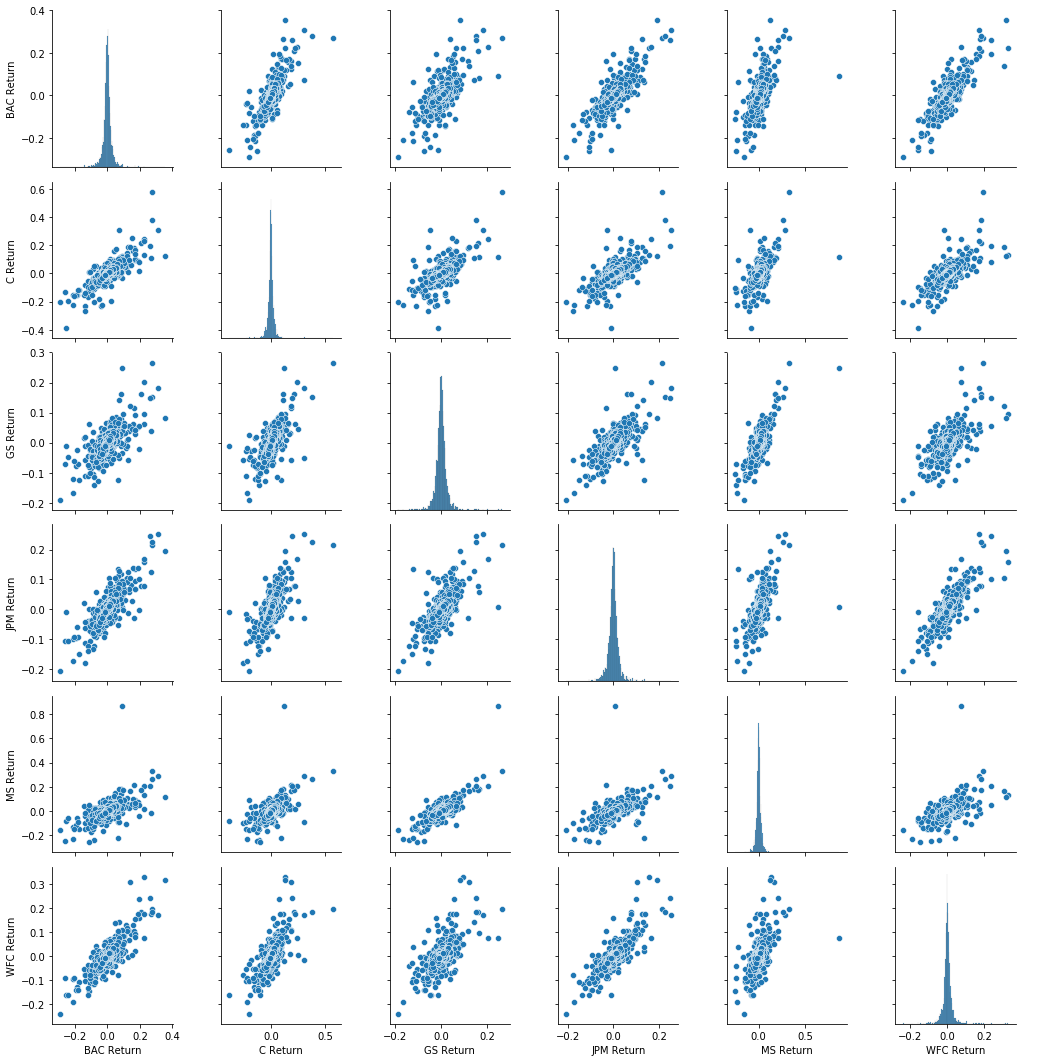

In [27]:
# Create a pairplot using seaborn of the returns dataframe. 
# What stock stands out to you? Can you figure out why?

sns.pairplot(data=returns)

In [28]:
# The behaviour for all banks looks fine

# Citi group has slightly vertical straight line
# This is because Citi group had a stock crash
# You can read about the crash on wikipedia